In [1]:
#本章需导入的模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
import matplotlib.cm as cm
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from sklearn import svm
import sklearn.linear_model as LM
import scipy.stats as st
from scipy.optimize import root,fsolve
from sklearn.feature_selection import  VarianceThreshold,SelectKBest,f_classif,chi2
from sklearn.feature_selection import RFE,RFECV,SelectFromModel
from sklearn.linear_model import Lasso,LassoCV,lasso_path,Ridge,RidgeCV
from sklearn.linear_model import enet_path,ElasticNetCV,ElasticNet

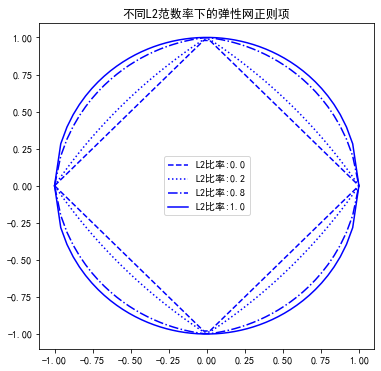

In [2]:
def fun(x,r,sb1):
    return np.array(r*(x**2)+(1-r)*abs(x)+sb1-1)

rs=[0,0.2,0.8,1]
b1=np.linspace(-1,1,50)
y1=np.zeros((len(b1),))
y2=np.zeros((len(b1),))
ltype=['--',':','-.','-']
plt.figure(figsize=(6,6))
for r,lt in zip(rs,ltype):
    sb1=r*(b1**2)+(1-r)*abs(b1)
    for i in np.arange(len(b1)):
        sol=fsolve(fun,[-1,1],args=(r,sb1[i]))
        y1[i]=sol[0]
        y2[i]=sol[1]
    plt.plot(b1,y1,linestyle=lt,c='b',label='L2比率:%.1f'%r)  
    plt.plot(b1,y2,linestyle=lt,c='b')
    plt.title("不同L2范数率下的弹性网正则项")
plt.legend()         